In [1]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")
from controllers.learner.datasets import get_image_data, get_hue_data, connect_hue_image
import controllers.learner.datasets as ds

In [12]:
import time
start_time = time.time() - 400000
end_time = time.time()
username = "sean"

In [13]:
img_data = list(get_image_data(username, start_time, end_time))
hue_data = get_hue_data(username, start_time, end_time)

In [14]:
print(len(img_data), len(hue_data))

205173 30460


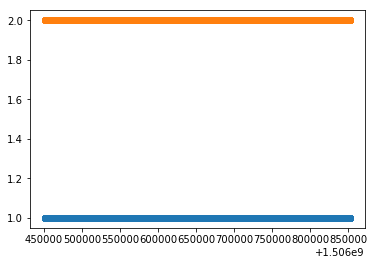

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img_times = np.array([d["time"] for d in img_data])
plt.plot(img_times, np.ones(img_times.shape[0]), "o")

hue_times = np.array([d["time"] for d in hue_data])
plt.plot(hue_times, np.ones(hue_times.shape[0])+1, "o")

In [16]:
image_features = [np.load("./image_features/" + fn["image_features_filename"]) for fn in img_data]

In [17]:
new_hue_data, n_lights = ds.reshape_hue_data(hue_data)
hue_classes, labels, counts = ds.get_hue_labels(new_hue_data)

In [18]:
y = connect_hue_image(img_data, hue_data, labels)
print(hue_classes)

[(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15324.0, 254.0, 254.0), (0.0, 1.0, 14910.0, 144.0, 254.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15324.0, 254.0, 254.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 13537.0, 200.0, 144.0, 0.0, 1.0, 0.0, 0.0, 0.0), (1.0, 1.0, 33862.0, 50.0, 254.0, 1.0, 1.0, 33862.0, 50.0, 254.0, 0.0, 1.0, 0.0, 0.0, 0.0)]


In [ ]:
colors = []
import matplotlib

for i, label in enumerate(y):
    if i % 1000 == 0:
        print(i, "/", len(y), flush=True)
    
    if label == len(hue_classes):
        hsb = [0, 0, 0]
    else:
        hue_class = hue_classes[label]
        hsb = [hue_class[7]/65536.0, hue_class[8]/255.0, hue_class[9]/255.0]
    rgb = matplotlib.colors.hsv_to_rgb(hsb)
    colors.append(rgb)
print("done")

In [ ]:
from sklearn.manifold import TSNE    
tsne = TSNE(n_components=2)
x = tsne.fit_transform(image_features)
plt.scatter(x[:,0][::-1], x[:,1][::-1], c=colors[::-1], cmap='rgb')

In [ ]:
from sklearn.decomposition import PCA    
tsne = PCA(n_components=2)
x = tsne.fit_transform(image_features)
plt.scatter(x[:,0][::-1], x[:,1][::-1], c=colors[::-1], cmap='rgb')